In [1]:
from dataset.translate import *

import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import PIL
from PIL import Image
import plotly.express as px

In [2]:
translate

{'cane': 'dog',
 'cavallo': 'horse',
 'elefante': 'elephant',
 'farfalla': 'butterfly',
 'gallina': 'chicken',
 'gatto': 'cat',
 'mucca': 'cow',
 'pecora': 'sheep',
 'ragno': 'spider',
 'scoiattolo': 'squirrel',
 'dog': 'cane',
 'horse': 'cavallo',
 'elephant': 'elefante',
 'butterfly': 'farfalla',
 'chicken': 'gallina',
 'cat': 'gatto',
 'cow': 'mucca',
 'spider': 'ragno',
 'sheep': 'pecora',
 'squirrel': 'scoiattolo'}

In [3]:
dataset_base_path = "dataset/raw-img"

In [4]:
os.listdir(dataset_base_path)

['scoiattolo',
 'pecora',
 'elefante',
 'ragno',
 'mucca',
 'cavallo',
 'farfalla',
 'gatto',
 'cane',
 'gallina']

In [5]:
# for italian_category in os.listdir(dataset_base_path):
#   old_path = os.path.join(dataset_base_path, italian_category)
#   new_path = os.path.join(dataset_base_path, translate[italian_category])
#   os.rename(old_path, new_path)

# Analyse image distributions

## Analyse number of images among the categories

In [6]:
categories_dist = []

for category in os.listdir(dataset_base_path):
  category_path = os.path.join(dataset_base_path, category)
  category_n = len(os.listdir(category_path))
  print(f"{category} has {category_n} images")
  categories_dist.append({"category": category, "count": category_n})

scoiattolo has 1862 images
pecora has 1820 images
elefante has 1446 images
ragno has 4821 images
mucca has 1866 images
cavallo has 2623 images
farfalla has 2112 images
gatto has 1668 images
cane has 4863 images
gallina has 3098 images


In [7]:
category_df = pd.DataFrame(categories_dist)
category_df.head()

,category,count
0,scoiattolo,1862
1,pecora,1820
2,elefante,1446
3,ragno,4821
4,mucca,1866


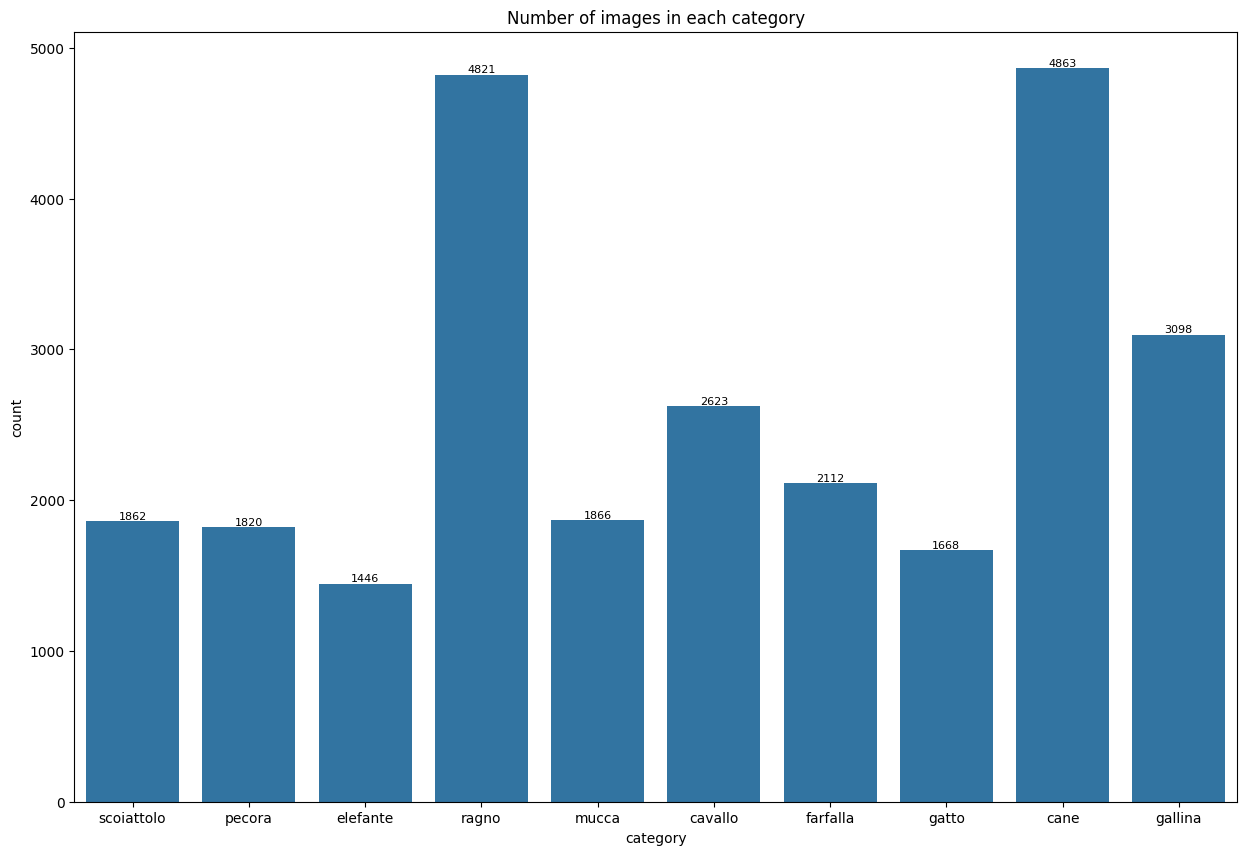

In [8]:
plt.figure(figsize=(15, 10))
ax = sns.barplot(category_df, x="category", y="count")
plt.bar_label(ax.containers[0], labels=[c for c in category_df["count"].values], fontsize=8)
plt.title("Number of images in each category")
plt.show()

In [9]:
fig = px.pie(category_df, values='count', names='category', title='Distribution of Images by Category (%)', hole=0.3)
fig.update_layout(height=600, width=600)
fig.show()

## Analyse image sizes among categories

In [10]:
categories_image_sizes = {}
total_sizes = []

for category in os.listdir(dataset_base_path):
  category_sizes = []
  category_path = os.path.join(dataset_base_path, category)
  for img in os.listdir(category_path):
    img_path = os.path.join(category_path, img)
    with Image.open(img_path) as image:
      width, height = image.size
    category_sizes.append({"width": width, "height": height})
    total_sizes.append({"width": width, "height": height})

  category_sizes_df = pd.DataFrame(category_sizes)
  categories_image_sizes[category] = category_sizes_df
  

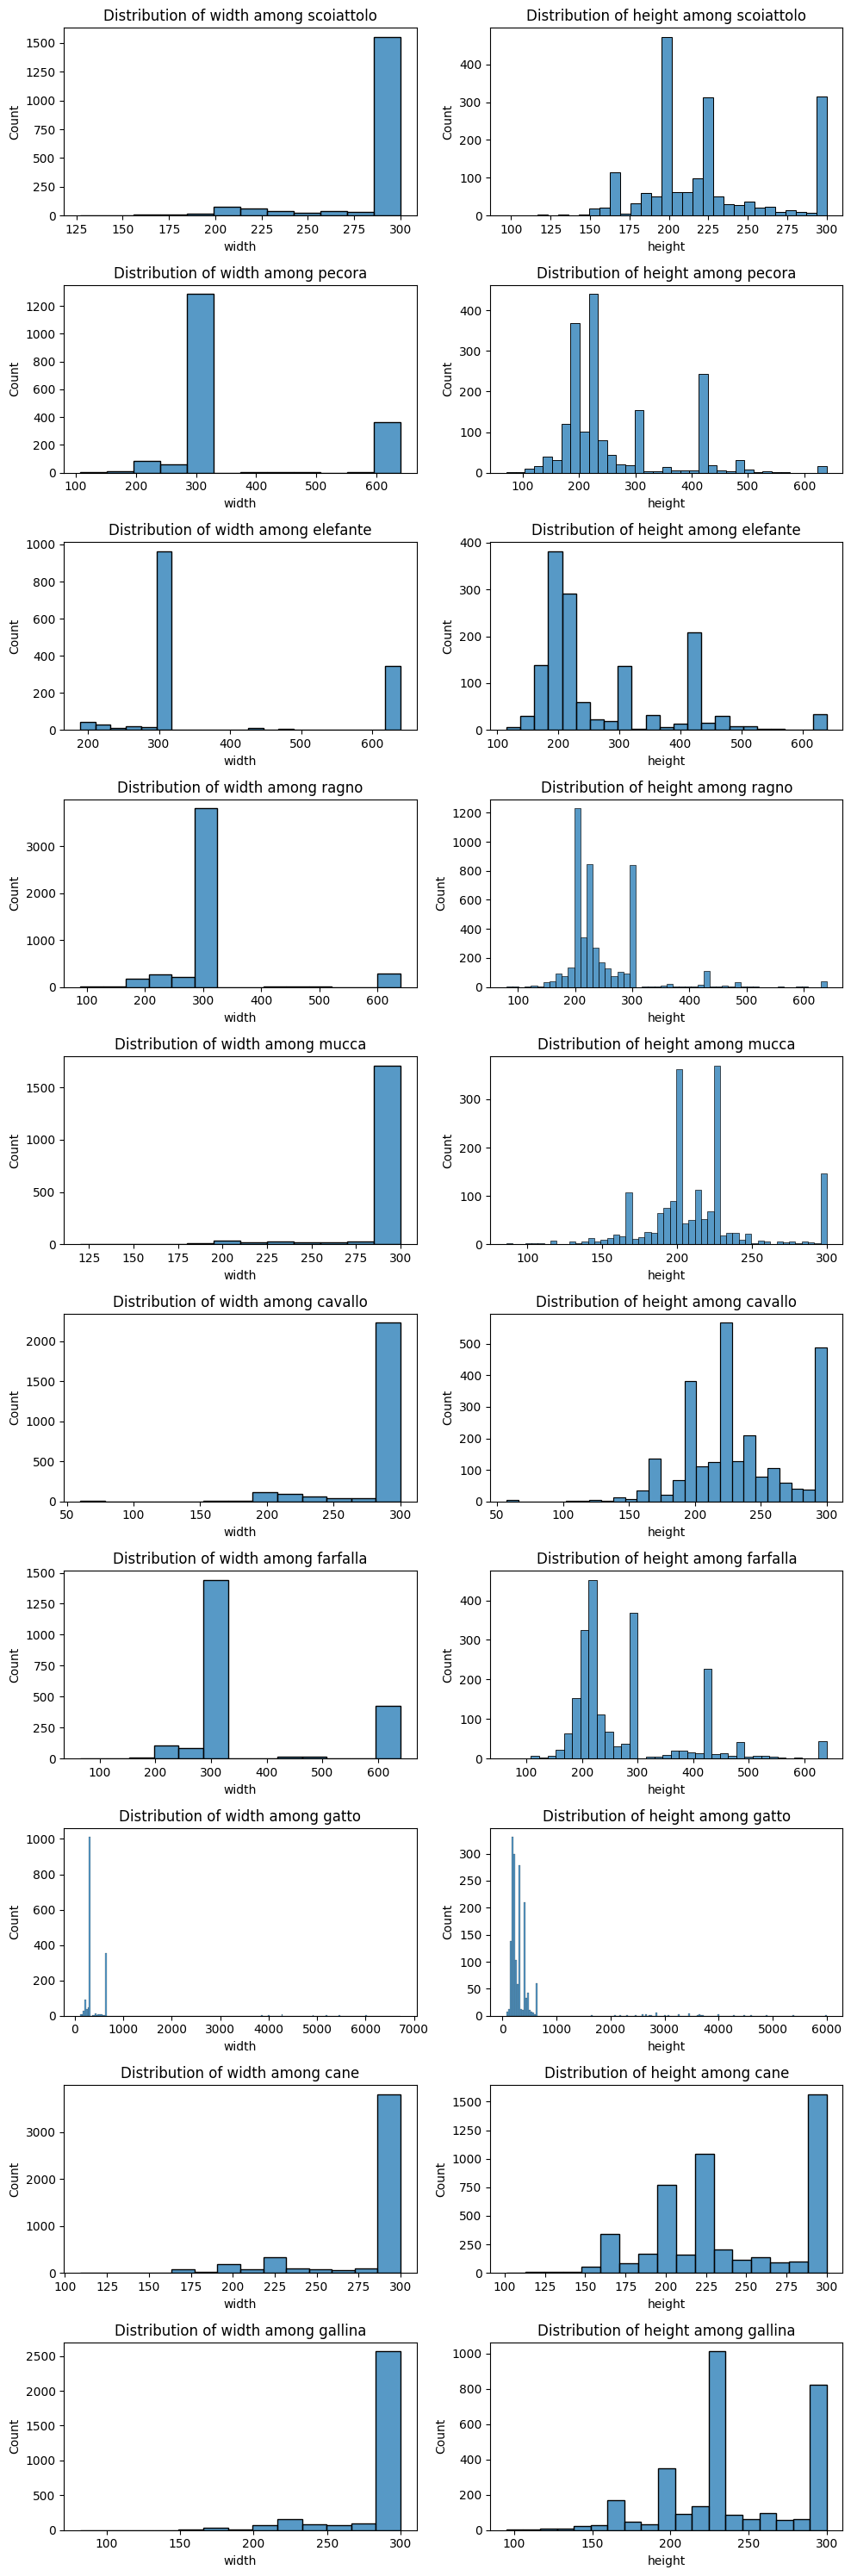

In [11]:
n_cols = 2
n_rows = len(categories_image_sizes.keys())

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(5 * n_cols, 3 * n_rows))

if n_rows == 1:
    axes = axes.reshape(1, -1)

for i, category in enumerate(categories_image_sizes.keys()):
  category_sizes_df = categories_image_sizes[category]

  ax = axes[i, 0]
  sns.histplot(data=category_sizes_df, x="width", ax=ax)
  ax.set_title(f"Distribution of width among {category}")

  ax = axes[i, 1]
  sns.histplot(data=category_sizes_df, x="height", ax=ax)
  ax.set_title(f"Distribution of height among {category}")

plt.tight_layout()
plt.show()


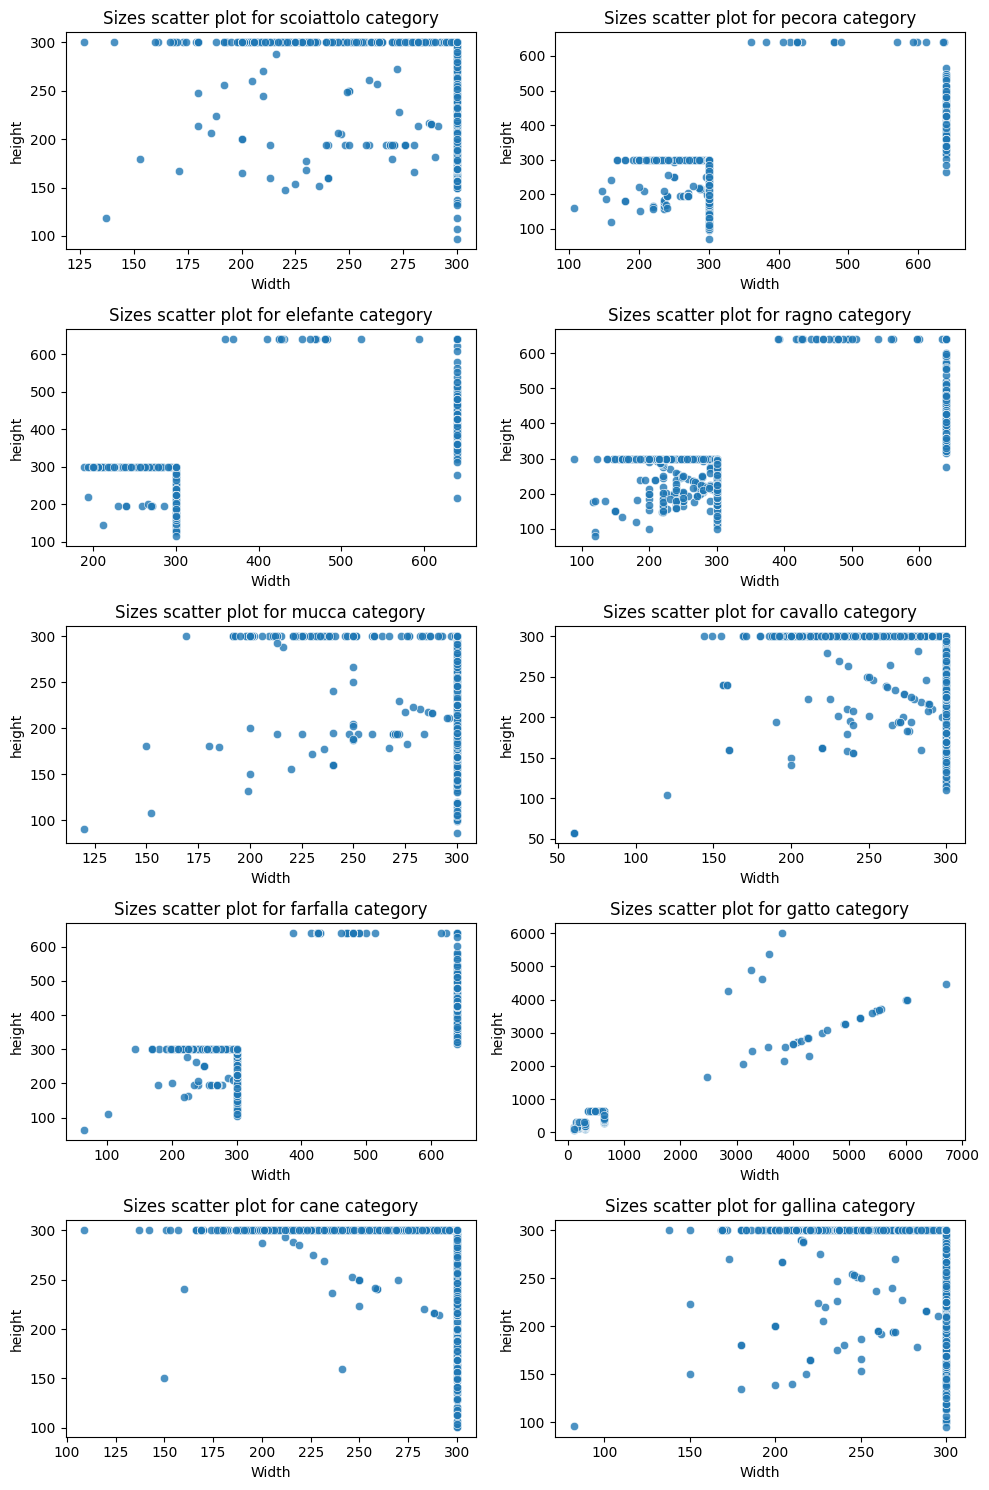

In [12]:
n_cols = 2
n_rows = math.ceil(len(categories_image_sizes.keys()) / n_cols)

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(5 * n_cols, 3 * n_rows))

axes = axes.flatten()

for i, category in enumerate(categories_image_sizes.keys()):
  category_sizes_df = categories_image_sizes[category]

  ax = axes[i]
  sns.scatterplot(data=category_sizes_df, x="width", y="height", alpha=0.8, ax=ax)
  ax.set_title(f"Sizes scatter plot for {category} category")
  ax.set_xlabel("Width")
  ax.set_ylabel("height")

plt.tight_layout()
plt.show()


## Distribution of sizes among all images

In [13]:
total_sizes_df = pd.DataFrame(total_sizes)

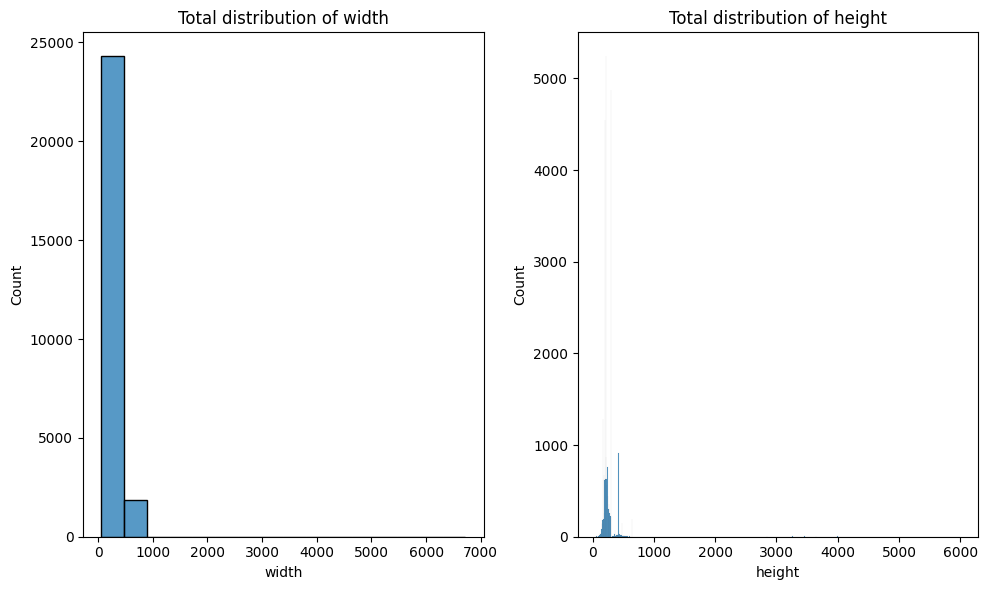

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))

ax = axes[0]
sns.histplot(total_sizes_df, x="width", ax=ax)
ax.set_title("Total distribution of width")

ax = axes[1]
sns.histplot(total_sizes_df, x="height", ax=ax)
ax.set_title("Total distribution of height")

plt.tight_layout()
plt.show()

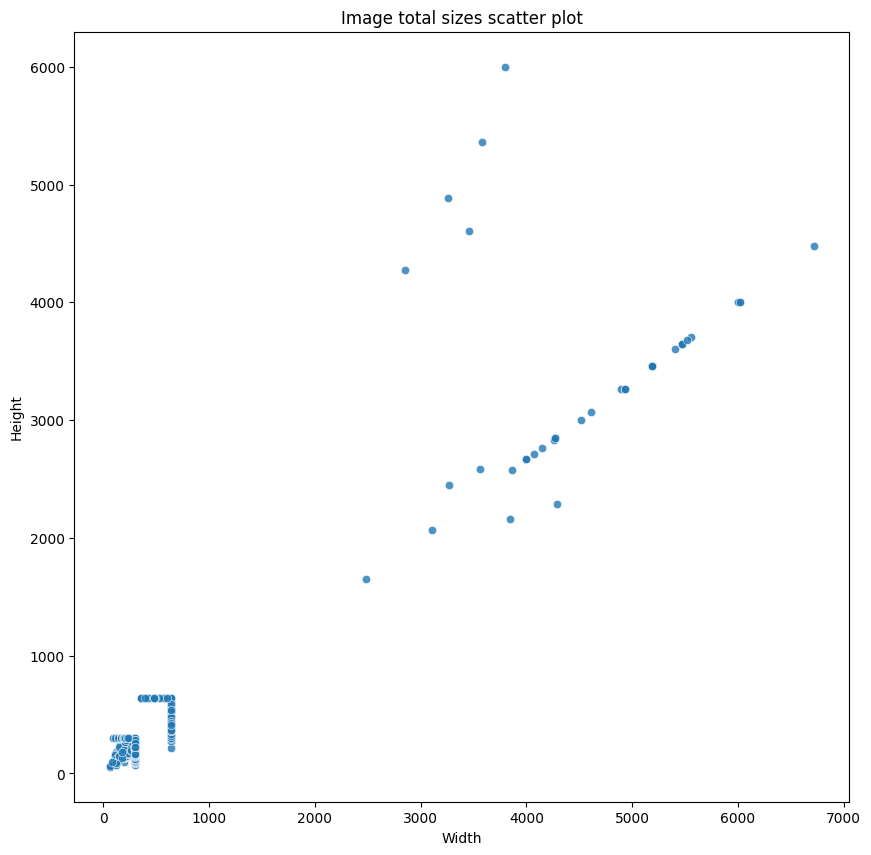

In [15]:
plt.figure(figsize=(10, 10))

sns.scatterplot(total_sizes_df, x="width", y="height", alpha=0.8)
plt.title("Image total sizes scatter plot")
plt.xlabel("Width")
plt.ylabel("Height")

plt.show()

In [16]:
total_sizes_df.min()

width     60
height    57
dtype: int64

In [17]:
total_sizes_df.mean()

width     320.038810
height    252.630162
dtype: float64